## Pair Programming Métricas

In [17]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
from IPython.display import display

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:
* Calculad las métricas para vuestro modelo
* Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [3]:
df_esta = pd.read_pickle("../Datos/obesity_est_encoding.pkl")
df_esta.head()

,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,0,1,0,2,0,0,3,3,1,-0.521741,2.0,3.0,2.0,0.0,1.0,-0.875589,-0.862558
1,1,0,1,0,2,1,1,2,3,1,-0.521741,3.0,3.0,3.0,3.0,0.0,-1.947599,-1.168077
2,2,1,1,0,2,0,0,1,3,1,-0.207057,2.0,3.0,2.0,2.0,1.0,1.054029,-0.366090
3,3,1,0,0,2,0,0,1,4,5,0.422312,3.0,3.0,2.0,2.0,0.0,1.054029,0.015808
4,4,1,0,0,2,0,0,2,3,6,-0.364399,2.0,1.0,2.0,0.0,0.0,0.839627,0.122740


In [4]:
# separamos los datos en X e y

X1 = df_esta.drop("nivel_obesidad", axis = 1)
y1 = df_esta["nivel_obesidad"]

In [5]:
# comprobamos qué tenemos en X, deberíamos tener todas nuestras variables predictoras

X1.head()

,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,0,1,0,2,0,0,3,3,-0.521741,2.0,3.0,2.0,0.0,1.0,-0.875589,-0.862558
1,1,0,1,0,2,1,1,2,3,-0.521741,3.0,3.0,3.0,3.0,0.0,-1.947599,-1.168077
2,2,1,1,0,2,0,0,1,3,-0.207057,2.0,3.0,2.0,2.0,1.0,1.054029,-0.366090
3,3,1,0,0,2,0,0,1,4,0.422312,3.0,3.0,2.0,2.0,0.0,1.054029,0.015808
4,4,1,0,0,2,0,0,2,3,-0.364399,2.0,1.0,2.0,0.0,0.0,0.839627,0.122740


In [6]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

y1.head()

0    1
1    1
2    1
3    5
4    6
Name: nivel_obesidad, dtype: int64

In [7]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [8]:
# ajuste y prediccion del modelo
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

/home/chloeiris/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


La siguiente matriz relaciona las predicciones realizadas por nuestro modelo y los valores reales de nuestros datos. 

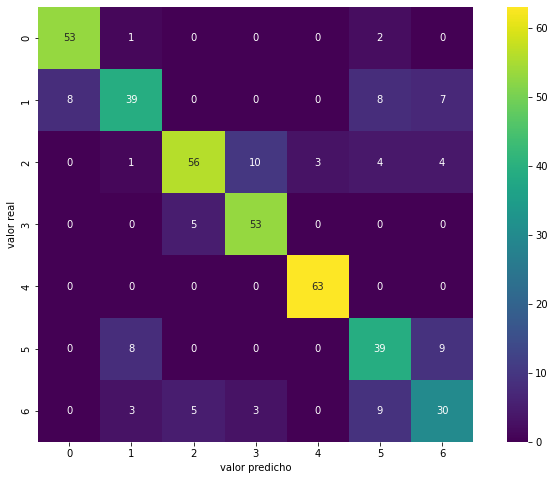

In [9]:
# Graficamos la madtriz de confusión para nuestro modelo
mat_lr_esta = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [10]:
# Definimos una funcion para extraer las métricas de nuestro modelo
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test, average=None)
    recall_test = recall_score(clases_reales_test, clases_predichas_test, average=None)
    f1_test = f1_score(clases_reales_test, clases_predichas_test, average=None)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train, average=None)
    recall_train = recall_score(clases_reales_train, clases_predichas_train, average=None)
    f1_train = f1_score(clases_reales_train, clases_predichas_train, average=None)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [11]:
# Extraemos los resultados de las métricas, y vemos que hay una métrica diferente para cada categoría respuesta
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.787234,"[0.8688524590163934, 0.75, 0.8484848484848485,...","[0.9464285714285714, 0.6290322580645161, 0.717...","[0.9059829059829059, 0.6842105263157896, 0.777...",0.751474,test,Regresión logistica Esta
1,0.818720,"[0.853448275862069, 0.7300884955752213, 0.8136...","[0.9166666666666666, 0.7333333333333333, 0.783...","[0.8839285714285714, 0.7317073170731707, 0.798...",0.788352,train,Regresión logistica Esta


In [30]:
# Extraemos las métricas para cada una de nuestras categorías de la variable respuesta
d ={'result_0':{}, 'result_1':{},'result_2':{},'result_3':{},'result_4':{},'result_5':{},'result_6':{}}

for i, key in enumerate(d):
    dicc ={'accuracy':[], 'precision':[], 'recall':[], 'f1':[], 'kapppa':[], 'set':[], 'modelo':[]}

    for k, v in dicc.items():
        if type(results_logistic_esta[k][0]) != np.ndarray:
            dicc[k].append(results_logistic_esta[k][0])
            dicc[k].append(results_logistic_esta[k][1])
        else:
            dicc[k].append(list(results_logistic_esta[k][0])[i])
            dicc[k].append(list(results_logistic_esta[k][1])[i])
            
    d[key] = pd.DataFrame(dicc)
    

In [31]:
# Mostramos las metricas en un dataframe para cada categoría
for k,v in d.items():
    print(f'Dataframe resultado para {k}:')
    display(d[k])

Dataframe resultado para result_0:


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.787234,0.868852,0.946429,0.905983,0.751474,test,Regresión logistica Esta
1,0.818720,0.853448,0.916667,0.883929,0.788352,train,Regresión logistica Esta


Dataframe resultado para result_1:


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.787234,0.750000,0.629032,0.684211,0.751474,test,Regresión logistica Esta
1,0.818720,0.730088,0.733333,0.731707,0.788352,train,Regresión logistica Esta


Dataframe resultado para result_2:


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.787234,0.848485,0.717949,0.777778,0.751474,test,Regresión logistica Esta
1,0.818720,0.813688,0.783883,0.798507,0.788352,train,Regresión logistica Esta


Dataframe resultado para result_3:


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.787234,0.803030,0.913793,0.854839,0.751474,test,Regresión logistica Esta
1,0.818720,0.873518,0.924686,0.898374,0.788352,train,Regresión logistica Esta


Dataframe resultado para result_4:


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.787234,0.954545,1.000000,0.976744,0.751474,test,Regresión logistica Esta
1,0.818720,0.962406,0.980843,0.971537,0.788352,train,Regresión logistica Esta


Dataframe resultado para result_5:


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.787234,0.629032,0.696429,0.661017,0.751474,test,Regresión logistica Esta
1,0.818720,0.757848,0.722222,0.739606,0.788352,train,Regresión logistica Esta


Dataframe resultado para result_6:


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.787234,0.600000,0.6000,0.600000,0.751474,test,Regresión logistica Esta
1,0.818720,0.706667,0.6625,0.683871,0.788352,train,Regresión logistica Esta


Recordemos nuestras categorías de nuestra variable respuesta:


|  nivel_obesidad: 	|   	|   	|   	|   	|   	|   	|
|---	|---	|---	|---	|---	|---	|---	|
|  Insufficient_Weight = 0 	|  Normal_Weight = 1 	|  Obesity_Type_I = 2 	|  Obesity_Type_II = 3 	|  Obesity_Type_III = 4 	| Overweight_Level_I = 5  	|   Overweight_Level_II = 6	|

> En nuestro caso estamos interesadas en que nuestro modelo nos devuelva el menor numero de falsos negativos posible, ya que por la salud de las personas estudiadas será mejor tenerles en cuenta como positivos para aplicarles tratamiento o recomendarles cambios en sus hábitos.
>
> Por lo tanto buscaremos obtener recalls lo más altos posibles y no nos importará tener accuracies ligeramente más bajos.
>
> Por las métricas interpretamos que nuestro modelo es mejor prediciendo:
> * Obesidad de tipo III (cat-4): con un recall en test de 1.000000
> * Obesidad de tipo II (cat-3): con un recall en test de 0.913793
> * Obesidad de tipo I (cat-2): con un recall en test de 0.717949
> * Peso insuficiente (cat-0): con un recall en test de 0.946429
>
> Es el caso de que son las categorías que más nos interesan predecir por tratarse de los desequilibrios más importantes a tener en cuenta para un tratamiento.